Problem Statement -Prepare a classification model using the Naive Bayes algorithm for the salary dataset.
Train and test datasets are given separately. Use both for model building

Business Objective- The primary objective is to predict whether an individual earns above or below a 
certain salary threshold. This prediction can help in various business contexts, such as targeted marketing, 
resource allocation, or human resource planning.

Minimize -Minimize overfitting by ensuring the model doesn’t just memorize the training data but can
perform well on new, unseen data.

Maximize - Maximize the model’s ability to generalize by ensuring it performs well on unseen test data,
not just the training data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Let us first import the data set
salary_train=pd.read_csv("D:/Documents/Datasets/SalaryData_Train.csv")
salary_test=pd.read_csv("D:/Documents/Datasets/SalaryData_Test.csv")

In [7]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [11]:
salary_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [13]:
salary_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [15]:
salary_train.shape

(30161, 14)

In [17]:
salary_test.shape

(15060, 14)

In [19]:
#Exploratory data analysis
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [21]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [23]:
salary_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [25]:
salary_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

(array([4869., 5579., 5760., 5925., 3810., 2412., 1278.,  359.,  114.,
          55.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

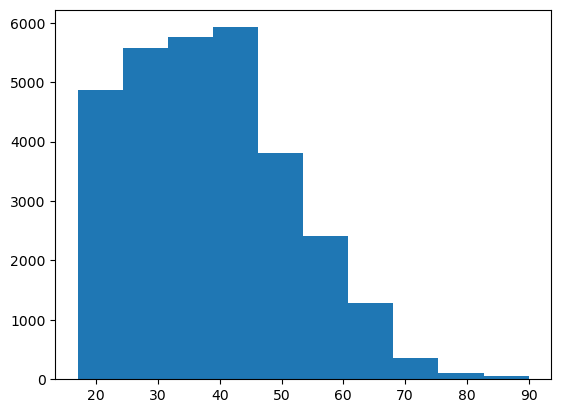

In [27]:
plt.hist(salary_train.age)

(array([ 196.,  288., 1012.,  820., 1425., 9840., 7984., 1008., 6671.,
         917.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

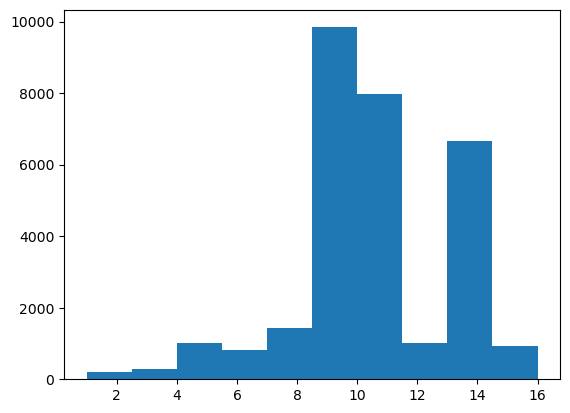

In [29]:
plt.hist(salary_train.educationno)

In [31]:
#apply label encoder to input feature
string_columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [33]:
for i in string_columns:
    salary_train[i]=label_encoder.fit_transform(salary_train[i])
    salary_test[i]=label_encoder.fit_transform(salary_test[i])


In [41]:

def norm_funct(i):
    x=(i-i.min())/(i.max()-i.min())
    return x
salary_train_norm=norm_funct(salary_train)       
salary_test_norm=norm_funct(salary_test)        

In [43]:
salary_train_col=list(salary_train.columns)
train_X=salary_train[salary_train_col[0:13]]
train_y=salary_train[salary_train_col[13]]

salary_test_col=list(salary_test.columns)
test_X=salary_test[salary_test_col[0:13]]
test_y=salary_test[salary_test_col[13]]

In [45]:
#Build a Naïve Bayes model.
from sklearn.naive_bayes import MultinomialNB as MB
classifier_mb=MB()

classifier_mb.fit(train_X,train_y)

MultinomialNB()

In [47]:
#Let us now evaluate on test data
test_pred_m=classifier_mb.predict(test_X)
##Accuracy of the prediction
accuracy_test_m=np.mean(test_pred_m==test_y)
accuracy_test_m

0.7749667994687915

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(test_pred_m,test_y)
pd.crosstab(test_pred_m,test_y)

Salary,0,1
row_0,,
0,10891,2920
1,469,780


In [51]:
train_pred_m=classifier_mb.predict(train_X)
#Accuracy 
accuracy_train_m=np.mean(train_pred_m==train_y)
accuracy_train_m

0.7729186698053778

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(train_pred_m,train_y)
pd.crosstab(train_pred_m,train_y)

Salary,0,1
row_0,,
0,21717,5913
1,936,1595


In [55]:
classifier_mb_lap=MB(alpha=0.75)
classifier_mb_lap.fit(train_X,train_y)


MultinomialNB(alpha=0.75)

In [57]:
#evaluate on test data
test_pred_lap=classifier_mb_lap.predict(test_X)
#Accuracy of the prediction
accuracy_test_lap=np.mean(test_pred_lap==test_y)
accuracy_test_lap
#confusion matrix
from sklearn.metrics import accuracy_score
accuracy_score(test_pred_lap,test_y)
pd.crosstab(test_pred_lap,test_y)

Salary,0,1
row_0,,
0,10891,2920
1,469,780


In [59]:
#evaluate on test data
test_pred_lap=classifier_mb_lap.predict(test_X)
#Accuracy 
accuracy_test_lap=np.mean(test_pred_lap==test_y)
accuracy_test_lap
#confusion matrix
from sklearn.metrics import accuracy_score
accuracy_score(test_pred_lap,test_y)
pd.crosstab(test_pred_lap,test_y)

Salary,0,1
row_0,,
0,10891,2920
1,469,780
